In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading 

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset 
data = pd.read_csv('preprocessed_data.csv')

# Separate features and target
X = data.drop('y', axis=1) 
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (36168, 42)
X_test shape: (9043, 42)


# RF Model

Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.9051199823067566
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.69      0.40      0.50      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.91      0.89      9043



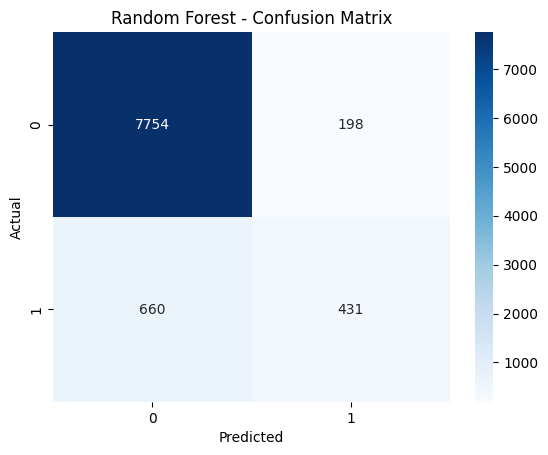

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# rf_model = RandomForestClassifier(
#     n_estimators=100, 
#     max_depth=10, 
#     min_samples_split=5, 
#     min_samples_leaf=3, 
#     class_weight='balanced',
#     random_state=42
# )


# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Training Accuracy:", accuracy_score(y_train, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Tunning 

In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize Random Forest and GridSearch
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_


Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [11]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     # 'bootstrap': [True, False]
# }

# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best hyperparameters and cross-validated accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# # Use the best model to predict on the test set
# best_rf_model = grid_search.best_estimator_
# rf_y_pred_test = best_rf_model.predict(X_test)

# rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test)

# # Evaluate on the test set
# print("Random Forest - Test Accuracy after Tuning:", rf_accuracy_tuned)
# print("Random Forest - Classification Report after Tuning:")
# print(classification_report(y_test, rf_y_pred_test))


In [13]:
# Make predictions with the tuned model
y_pred = best_rf_model.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.8865420767444432


# Evaluate on Training and Test Data

Post-Tuning - Training Accuracy: 0.9346383543463835
Post-Tuning - Test Accuracy: 0.8865420767444432
Post-Tuning - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      7952
           1       0.52      0.77      0.62      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.84      0.78      9043
weighted avg       0.91      0.89      0.90      9043



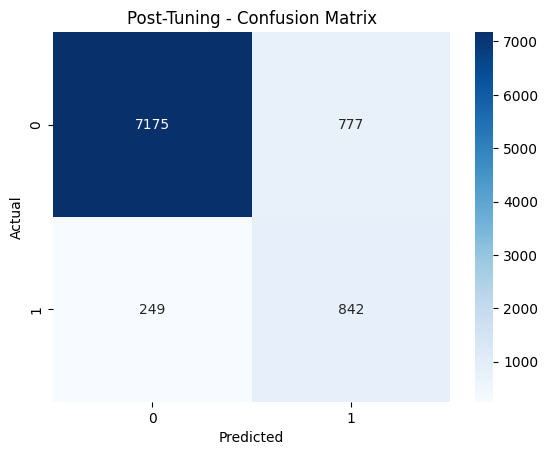

In [16]:
# Training accuracy
y_pred_train = best_rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Post-Tuning - Training Accuracy:", train_accuracy)

# Test accuracy
y_pred_test = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Post-Tuning - Test Accuracy:", test_accuracy)

#  Generate the Classification Report
from sklearn.metrics import classification_report

# Classification report for the test data
print("Post-Tuning - Classification Report:")
print(classification_report(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Post-Tuning - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Save the model

In [17]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf_model, 'random_forest_model.pkl')
print("Random Forest model saved successfully!")

Random Forest model saved successfully!
